In [8]:
import pandas as pd

df= pd.read_csv("../data/processed/processed.csv")
df.head()


,clean_text,text_length,word_count,kw_graph,kw_tree,kw_dp,kw_dynamic_programming,kw_recursion,kw_bfs,kw_dfs,kw_greedy,kw_binary_search,kw_segment_tree,kw_modulo,class_label,problem_score
0,uuu unununium (uuu) was the name of the chemic...,1567,285,5,0,0,0,0,0,0,0,0,0,0,1,9.7
1,house building a number of eccentrics from cen...,1329,239,0,0,0,0,0,0,0,0,0,0,0,1,9.7
2,mario or luigi mario and luigi are playing a g...,1227,218,0,0,0,0,0,0,0,0,0,0,0,1,9.6
3,the wire ghost žofka is bending a copper wire....,1301,236,0,0,0,0,0,0,0,0,0,0,0,1,9.6
4,barking up the wrong tree your dog spot is let...,2120,406,0,9,0,0,0,0,0,0,0,0,0,1,9.6


In [9]:
df.shape
df.columns

Index(['clean_text', 'text_length', 'word_count', 'kw_graph', 'kw_tree',
       'kw_dp', 'kw_dynamic_programming', 'kw_recursion', 'kw_bfs', 'kw_dfs',
       'kw_greedy', 'kw_binary_search', 'kw_segment_tree', 'kw_modulo',
       'class_label', 'problem_score'],
      dtype='object')

In [10]:
import joblib
X_text=df['clean_text']
numeric_features=df.drop(['clean_text','class_label','problem_score'],axis=1)

numeric_feature_names = numeric_features.columns.tolist()
joblib.dump(numeric_feature_names, "../models/numeric_feature_names.pkl")
y_class=df['class_label']
y_score=df['problem_score']

In [11]:
y_score

0       9.7
1       9.7
2       9.6
3       9.6
4       9.6
       ... 
4107    1.1
4108    1.1
4109    1.1
4110    1.1
4111    6.5
Name: problem_score, Length: 4112, dtype: float64

In [12]:
y_class

0       1
1       1
2       1
3       1
4       1
       ..
4107    0
4108    0
4109    0
4110    0
4111    1
Name: class_label, Length: 4112, dtype: int64

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=15000,
    ngram_range=(1, 2),
    min_df=2
)

X_tfidf = tfidf.fit_transform(X_text)

In [14]:
X_tfidf.shape

(4112, 15000)

In [15]:
from scipy.sparse import hstack

X_final = hstack([X_tfidf, numeric_features.values])


In [16]:
X_final.shape


(4112, 15013)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_class_train, y_class_test = train_test_split(
    X_final,
    y_class,
    test_size=0.2,
    random_state=42,
    stratify=y_class
)

_, _, y_score_train, y_score_test = train_test_split(
    X_final,
    y_score,
    test_size=0.2,
    random_state=42
)


In [18]:
import joblib 
joblib.dump(tfidf, "../models/tfidf_vectorizer.pkl")

['../models/tfidf_vectorizer.pkl']

In [19]:
print(X_train.shape)
print(X_test.shape) 

(3289, 15013)
(823, 15013)


In [20]:
print(y_class_train.value_counts(normalize=True))
print(y_class_test.value_counts(normalize=True))

class_label
1    0.471876
2    0.341745
0    0.186379
Name: proportion, dtype: float64
class_label
1    0.472661
2    0.341434
0    0.185905
Name: proportion, dtype: float64


In [36]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(
    max_iter=8000,
)

In [37]:
clf.fit(X_train, y_class_train)


c:\Users\Abhisaar\Desktop\AutoJudge\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 8000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=8000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [38]:
y_pred = clf.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_class_test, y_pred)
accuracy


0.5407047387606319

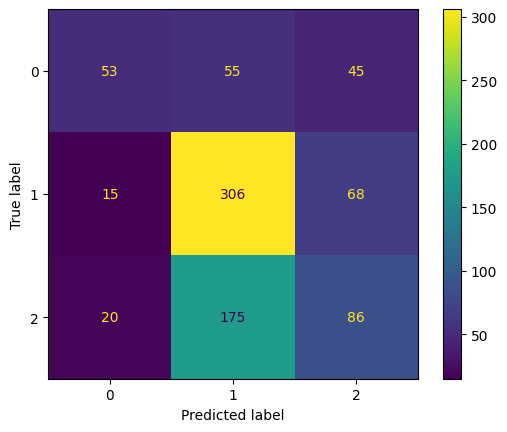

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_class_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_class_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.35      0.44       153
           1       0.57      0.79      0.66       389
           2       0.43      0.31      0.36       281

    accuracy                           0.54       823
   macro avg       0.54      0.48      0.49       823
weighted avg       0.53      0.54      0.52       823



In [27]:
import numpy as np

np.unique(y_pred, return_counts=True)

(array([0, 1, 2]), array([ 88, 536, 199]))

In [42]:
joblib.dump(clf, "../models/classification_model.pkl")

['../models/classification_model.pkl']